## Importing the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

## Importing CSV Data

In [2]:
# Load dataset
diabetes = pd.read_csv("diabetes.csv")

# Check the first 6 rows
diabetes.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [3]:
# Checking the dimension of the data(rows and columns)
diabetes.shape

(768, 9)

As observed above, there have 768 observations and 9 variables. The first 8 columns represent the features and the last column represent the target.

## Creating features/Input/independent and target/dependent

### Features

In [4]:
X = diabetes.drop(["Outcome"], axis=1)
X.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


### Creating Array of features

In [5]:
X = X.values

### Target variable

In [6]:
y = diabetes["Outcome"]
y.head(3)

0    1
1    0
2    1
Name: Outcome, dtype: int64

### Creating array target variable

In [7]:
y = y.values

## Split the data randomly into training and test set
* It is a best practice to perform our split in such a way that out split reflects theproportions of labels in the data. 
* If positive cases occurs in 10% of the observations the we want 10% of the label in training and test set to represent positive cases.This is achieved by setting `stratify = y`. 
* In other words, we want labels to be split in train and test set as they are in the original dataset.

Also we create a test set of size of about 20% of the dataset.

In [8]:
X_train, X_test, y_train, y_test = split(X, 
                                         y, 
                                         test_size=0.2, 
                                         random_state=21, 
                                         stratify=y)

## create a classifier using k-Nearest Neighbors algorithm
Accuracies for different values of k

In [9]:
neighbors = np.arange(1,20)
# Setup arrays to store training and test accuracies
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    #Fit the model
    knn.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    #Compute accuracy on the test set
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    

In [10]:
train = pd.DataFrame(list(train_accuracies.items()), columns=['n_neighbors', 'Training Accuracy'])
test = pd.DataFrame(list(test_accuracies.items()), columns=['n_neighbors', 'Testing Accuracy'])
Accuracy = train.merge(test, on="n_neighbors")
Accuracy

,n_neighbors,Training Accuracy,Testing Accuracy
0,1,1.000000,0.655844
1,2,0.835505,0.720779
2,3,0.858306,0.681818
3,4,0.799674,0.694805
4,5,0.796417,0.733766
5,6,0.780130,0.720779
6,7,0.794788,0.714286
7,8,0.778502,0.707792
8,9,0.798046,0.727273
9,10,0.783388,0.733766


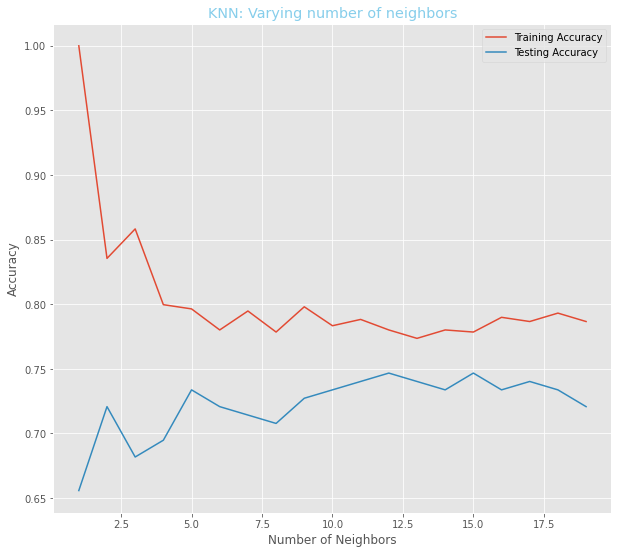

In [26]:
plt.figure(figsize=(10,9))
plt.title("KNN: Varying number of neighbors", color= 'skyblue')
plt.plot(neighbors, train_accuracies.values(), label = "Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label = "Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

We can observe above that we get maximum testing accuracy for k=9. So lets create a KNeighborsClassifier with number of neighbors as 9.

In [12]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7467532467532467

## Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Scikit-learn provides facility to calculate confusion matrix using the confusion_matrix method.

In [13]:
y_pred = knn.predict(X_test)

In [14]:
confusion_matrix(y_test,y_pred)

array([[91,  9],
       [30, 24]], dtype=int64)

Considering confusion matrix above:

True negative = 91

False positive = 9

True postive = 24

Fasle negative = 30

In [15]:
pd.crosstab(y_test, y_pred, rownames=["True"], colnames=["Predicted"], margins=True)

Predicted,0,1,All
True,,,
0,91,9,100
1,30,24,54
All,121,33,154


## Classification Report

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.73      0.44      0.55        54

    accuracy                           0.75       154
   macro avg       0.74      0.68      0.69       154
weighted avg       0.74      0.75      0.73       154



## ROC (Reciever Operating Charecteristic) curve

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

An ROC curve demonstrates several things:

1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3) The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

4) The area under the curve is a measure of test accuracy.

In [17]:
y_pred_prob = knn.predict_proba(X_test)[:,1]


In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

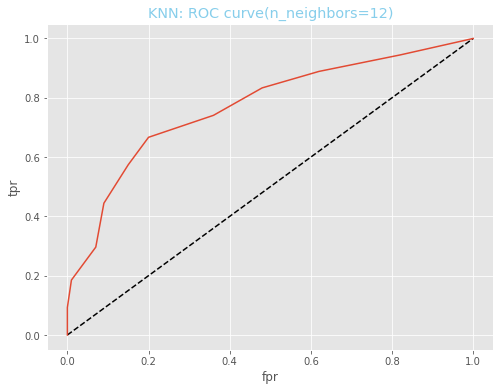

In [27]:
plt.figure(figsize=(8,6))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label = 'Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title("KNN: ROC curve(n_neighbors=12)", color= 'skyblue')
plt.show()

## Area under ROC curve

In [20]:
roc_auc_score(y_test, y_pred_prob)

0.7707407407407407

## Cross Validation

Now before getting into the details of Hyperparamter tuning, let us understand the concept of Cross validation.

The trained model's performance is dependent on way the data is split. It might not representative of the model’s ability to generalize.

The solution is cross validation.

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.

In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

Hyperparameter tuning

The value of k (i.e 7) we selected above was selected by observing the curve of accuracy vs number of neighbors. This is a primitive way of hyperparameter tuning.

There is a better way of doing it which involves:

1) Trying a bunch of different hyperparameter values

2) Fitting all of them separately

3) Checking how well each performs

4) Choosing the best performing one

5) Using cross-validation every time

Scikit-learn provides a simple way of achieving this using GridSearchCV i.e Grid Search cross-validation.

In [21]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
paramgrid = {'n_neighbors' :np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, paramgrid, cv= 5)
knn_cv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [22]:
knn_cv.best_score_

0.7578558696205755

In [23]:
knn_cv.best_params_

{'n_neighbors': 14}

Thus a knn classifier with number of neighbors as 14 achieves the best score/accuracy of 0.7578 i.e about 76%